Assignment DSA 5

Rahul Suregaonkar FSDS 2.0



<aside>
💡 **Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

</aside>

In [3]:
class Solution1:
    def diStringMatch(self, s: str) -> [int]:
        ans=[0]*(len(s)+1)
        count=0
        high=len(s)
        for i in range(len(s)):
            if s[i]=="I":
                ans[i]=count
                count+=1
            else:
                ans[i]=high
                high-=1
        ans[-1]=count
        return ans

In [4]:
Solution1.diStringMatch(Solution1,"IDID")

[0, 4, 1, 3, 2]

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**
**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true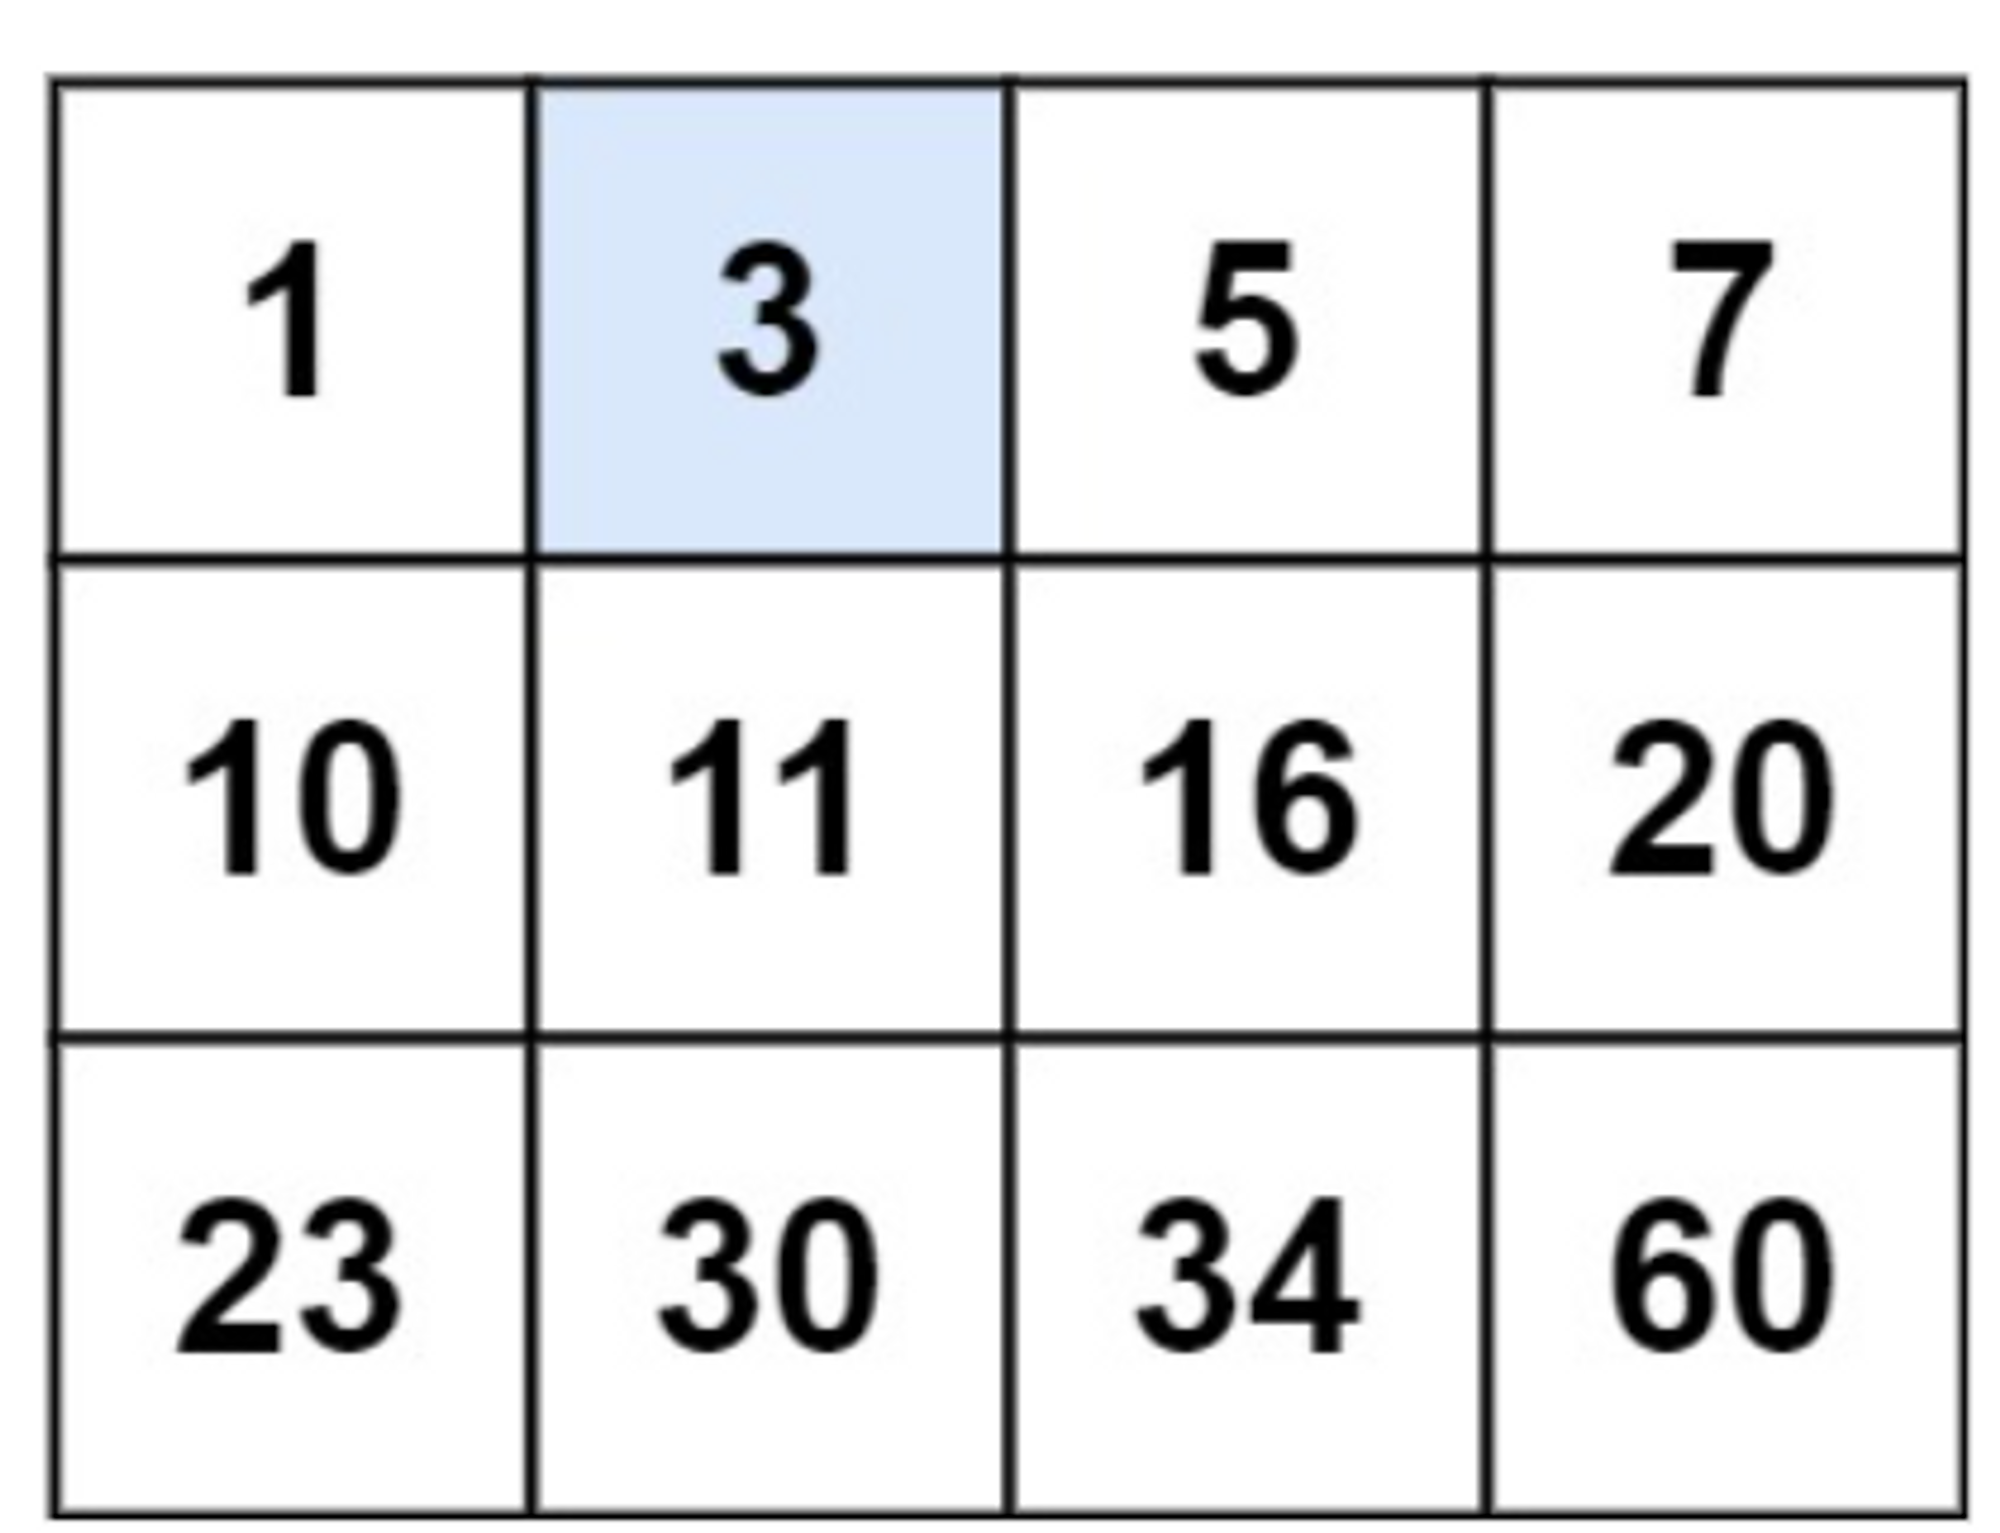

In [6]:
class Solution2:
    def searchMatrix(self, matrix: [[int]], target: int) -> bool:
        r, c = 0, len(matrix[0]) - 1

        while r < len(matrix) and c >= 0:
            if matrix[r][c] < target: r += 1
            elif matrix[r][c] > target: c -= 1
            else: return True
        
        return False

In [7]:
Solution2.searchMatrix(0,[[1,3,5,7],[10,11,16,20],[23,30,34,60]],3)

True

<aside>
💡 **Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]
</aside>
**Example 1:**

**Input:** arr = [2,1]

**Output:**

false


In [9]:
#After finding the maximum number's index in the array, we divide the arry into 2 parts: 1 - all the numbers to the left of the maximum number and 2 - all the numbers to the right of the maximum number.
#We then check if list 1 is strictly increasing. If it is, then we check for whether list 2 is strictly decreasing. If both these conditions are true, we return True, otherwise, we return False.

class Solution3:
    def validMountainArray(self, arr: [int]) -> bool:
        place = arr.index(max(arr))
        if place == 0 or place == len(arr) - 1:
            return False
        else:
            value = True
            i = 0
            while i < place:
                if arr[i] >= arr[i + 1]:
                    value = False
                    break
                else:
                    i += 1
            i = place + 1
            if value:
                while i < len(arr):
                    if arr[i - 1] <= arr[i]:
                        print(i)
                        return False
                    else:
                        i += 1
            else:
                return False
            return True

In [10]:
Solution3.validMountainArray(0,[2,1])

False

<aside>
💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

</aside>

<aside>
💡 **Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

</aside>
Answer

Initialize a dictionary count with a key-value pair of 0: -1 to keep track of the count difference of 0's and 1's and the index at which it occurs.
Initialize two variables, max_len and count_diff to keep track of the maximum length of contiguous subarray and the difference between the count of 0's and 1's, respectively.
Traverse through the input nums list using a for loop and enumerate() function to get the index and value of each element in the list.
For each element in the nums list, update the count_diff variable by incrementing 1 if the element is 1 or decrementing 1 if the element is 0.
If the count_diff variable is present in the count dictionary, update the max_len variable with the maximum value of max_len and the difference between the current index and the index of the previous occurrence of the same count_diff.
Else, add the count_diff and its corresponding index to the count dictionary.
Return the max_len variable, which stores the length of the longest contiguous subarray with an equal number of 0 and 1.

In [12]:
class Solution4:
    def findMaxLength(self, nums: [int]) -> int:
        count = {0: -1}  # Initial count of 0's and 1's
        max_len = count_diff = 0
        
        for i, num in enumerate(nums):
            count_diff += 1 if num == 1 else -1  # Increment count of 1's or 0's
            if count_diff in count:
                max_len = max(max_len, i - count[count_diff])
            else:
                count[count_diff] = i
        
        return max_len

In [13]:
Solution4.findMaxLength(0,[0,1])
#[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

2

<aside>
💡 **Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

</aside>

In [17]:
class Solution5:
    def minProductSum(self, nums1: [int], nums2: [int]) -> int:
        nums1.sort()
        nums2.sort(reverse=True)
        ans = 0
        for i in range(len(nums1)):
            ans += nums1[i] * nums2[i]
        return ans

In [18]:
Solution5.minProductSum(0,[5,3,4,2], [4,2,2,5])

40

Question 6

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

In [3]:
from collections import Counter
class Solution7:
    def findOriginalArray(self, changed: [int]) -> [int]:
        changed.sort()
        nz=changed.count(0)
        if nz%2==1:
            return []
        changed=changed[nz:]
        if len(changed)%2==1:
            return []
        cnt=Counter(changed)
        flst=[]
        for i in range(len(changed)):
            if cnt[changed[i]]>0:
                if 2*changed[i] in cnt and cnt[2*changed[i]]>0:
                    cnt[2*changed[i]]-=1
                    cnt[changed[i]]-=1
                    flst.append(changed[i])
                else:
                    return []
            
        return flst+[0]*(nz//2)

In [4]:
Solution7.findOriginalArray(0,[1,3,4,2,6,8])

[1, 3, 4]

Question 7


Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**
**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

In [6]:
class Solution8:
    def generateMatrix(self, n: int) -> [[int]]:
        ans = [[0 for _ in range(n)] for _ in range(n)]
        i, r, c = 1, 0, 0

        while i <= n**2:
            while r < n and ans[c][r] == 0:
                ans[c][r] = i
                r += 1 if r != n-1 and ans[c][r+1] == 0 else 0
                i += 1
            c += 1

            while c < n and ans[c][r] == 0:
                ans[c][r] = i
                c += 1 if c != n-1 and ans[c+1][r] == 0 else 0
                i += 1
            r -= 1

            while r >= 0 and ans[c][r] == 0:
                ans[c][r] = i
                r -= 1 if r != 0 and ans[c][r-1] == 0 else 0
                i += 1
            c -= 1

            while c >= 0 and ans[c][r] == 0:
                ans[c][r] = i
                c -= 1 if c != 0 and ans[c-1][r] == 0 else 0
                i += 1
            r += 1

        return ans

In [7]:
Solution8.generateMatrix(0, 3)

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]

<aside>
💡 **Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

</aside>


**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

In [10]:
class Solution9:
    def multiply(self, mat1: [[int]], mat2: [[int]]) -> [[int]]:
        r1, c1, c2 = len(mat1), len(mat1[0]), len(mat2[0])
        res = [[0] * c2 for _ in range(r1)]
        for i in range(r1):
            for j in range(c2):
                for k in range(c1):
                    res[i][j] += mat1[i][k] * mat2[k][j]
        return res

In [11]:
Solution9.multiply(0,[[1,0,0],[-1,0,3]],[[7,0,0],[0,0,0],[0,0,1]])

[[7, 0, 0], [-7, 0, 3]]